<a href="https://colab.research.google.com/github/tanviiishetty/sentiment-analysis-images/blob/main/sentiment_analysis_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload your downloaded "data.zip"

Saving data.zip to data.zip


In [3]:
import zipfile
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")


In [4]:
import os
for root, dirs, files in os.walk("dataset"):
    print(f"In folder: {root} — {len(files)} files")

In folder: dataset — 1 files
In folder: dataset/train — 0 files
In folder: dataset/train/sad — 4830 files
In folder: dataset/train/neutral — 4965 files
In folder: dataset/train/disgust — 436 files
In folder: dataset/train/angry — 3995 files
In folder: dataset/train/fear — 4097 files
In folder: dataset/train/happy — 7215 files
In folder: dataset/train/surprise — 3171 files
In folder: dataset/test — 0 files
In folder: dataset/test/sad — 1247 files
In folder: dataset/test/neutral — 1233 files
In folder: dataset/test/disgust — 111 files
In folder: dataset/test/angry — 958 files
In folder: dataset/test/fear — 1024 files
In folder: dataset/test/happy — 1774 files
In folder: dataset/test/surprise — 831 files


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [6]:
train_path = "dataset/train"
test_path = "dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.2910 - loss: 1.7533

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 181ms/step - accuracy: 0.2911 - loss: 1.7531 - val_accuracy: 0.4295 - val_loss: 1.4931
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 183ms/step - accuracy: 0.4360 - loss: 1.4841 - val_accuracy: 0.4656 - val_loss: 1.3933
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 179ms/step - accuracy: 0.4736 - loss: 1.3752 - val_accuracy: 0.4847 - val_loss: 1.3302
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 179ms/step - accuracy: 0.4996 - loss: 1.3156 - val_accuracy: 0.4960 - val_loss: 1.2988
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.5286 - loss: 1.2434 - val_accuracy: 0.5079 - val_loss: 1.2738
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.5373 - loss: 1.2111 - val_accuracy: 0.5130 - val_loss: 1.2743
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 179ms/step - accuracy: 0.5640 - loss: 1.1529 - val_accuracy: 0.5187 - val_loss: 1.2568
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.5797 - loss: 1.1019 - val

In [9]:
loss, acc = model.evaluate(test_data)
print(f"\n✅ Final Test Accuracy: {acc * 100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.5415 - loss: 1.2504

✅ Final Test Accuracy: 52.86%


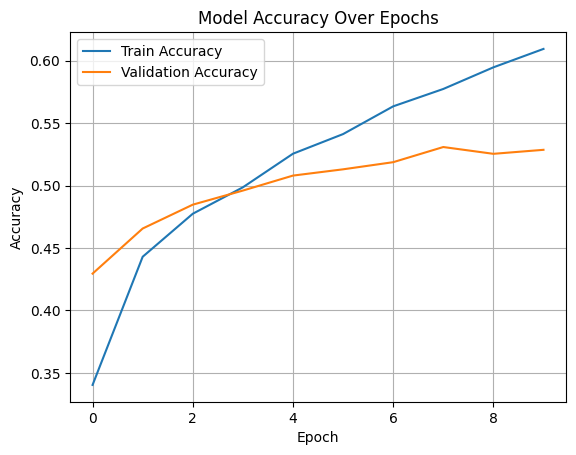

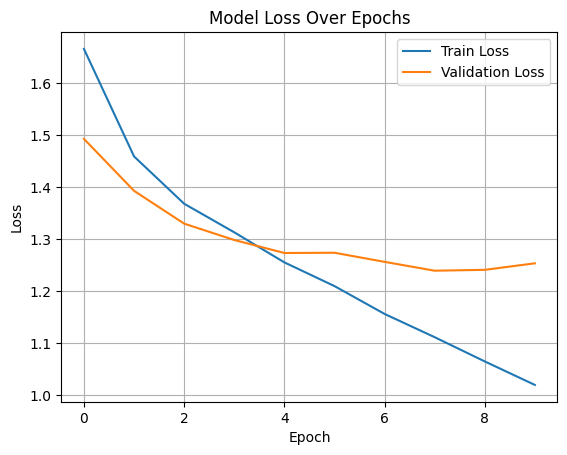

In [10]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [11]:
from google.colab import files
uploaded = files.upload()

Saving happy.jpg to happy.jpg


In [12]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Replace 'your_image.jpg' with the actual uploaded file name
img_path = list(uploaded.keys())[0]  # automatically get uploaded file name

# Load and preprocess
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension


In [13]:
# Class labels based on FER-2013 dataset
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]

print(f"✅ Predicted Emotion: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
✅ Predicted Emotion: Happy
